In [24]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt


In [25]:
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)

In [26]:
X.shape, y.shape

((1000, 2), (1000,))

In [27]:
df = pd.DataFrame({"X1":X[:,0],
                   "X2":X[:,1],
                   "Y":y})
df.head()

,X1,X2,Y
0,-0.081568,0.482211,1
1,1.087333,-0.381159,1
2,0.831725,-0.133135,1
3,0.200339,-0.500300,1
4,-0.824953,0.539526,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [29]:
X_train.shape

(800, 2)

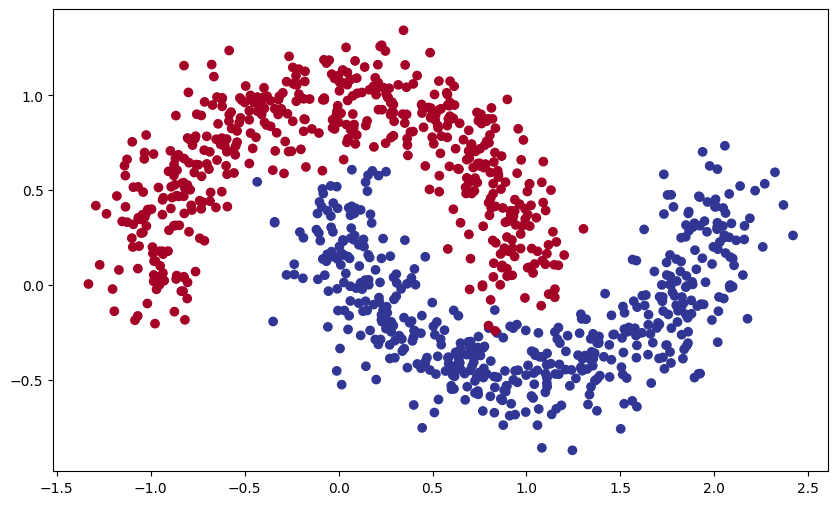

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1] , c=y, cmap=plt.cm.RdYlBu);

## Building a model

In [31]:
## creating device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [32]:
model = nn.Sequential(
          nn.Linear(in_features=2, out_features=10),
          nn.ReLU(),
          nn.Linear(in_features=10, out_features=10),
          nn.ReLU(),
          nn.Linear(in_features=10, out_features=1),
).to(device)



model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

## creating loss and optimizer function

In [33]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.1)

def acc_fn(y_pred, y_true):x
  correct = torch.eq(y_pred,y_true).sum()
  return correct/len(y_pred)*100


In [34]:
X_train , y_train = torch.from_numpy(X_train).type(torch.float), torch.from_numpy(y_train).type(torch.float)
X_test , y_test = torch.from_numpy(X_test).type(torch.float), torch.from_numpy(y_test).type(torch.float)
# X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

In [35]:
# making prediction with untrained model
model.eval()
with torch.inference_mode():

  # making predictions
  y_logits =model(X_train).squeeze()
  y_preds =  torch.round(torch.sigmoid(y_logits))


  # evaluating predictions
  loss = loss_fn(y_logits,y_train)

  print(f"loss = {loss}")



loss = 0.6950194835662842


## building training and testing loop

In [36]:
torch.manual_seed(42)

epochs=1000
train_loss= train_acc= test_loss= test_acc=[]

for epoch in range(epochs):
  # training the model
  model.train()

  # forward pass
  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # calculating loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_preds, y_train)
  train_loss.append(loss)
  train_acc.append(acc)

  # optimizer no grad
  optimizer.zero_grad()

  # backward propogation
  loss.backward()

  # optimizer step
  optimizer.step()


  #testing
  model.eval()
  with torch.inference_mode():
    y_test_logits = model(X_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))

    t_loss = loss_fn(y_test_logits,y_test_preds)
    t_acc = acc_fn(y_test_preds, y_test)
    test_loss.append(t_loss)
    test_acc.append(t_acc)

    if epoch % 100 == 0 :
      print(f" epochs: {epoch}  loss:{loss} acc:{acc:.2f}%  test_loss:{t_loss} test_acc:{t_acc:.2f}%")



 epochs: 0  loss:0.6950194835662842 acc:50.38%  test_loss:0.627166211605072 test_acc:48.50%
 epochs: 100  loss:0.3930180072784424 acc:82.88%  test_loss:0.3076332211494446 test_acc:81.50%
 epochs: 200  loss:0.2689913809299469 acc:87.25%  test_loss:0.15728740394115448 test_acc:88.50%
 epochs: 300  loss:0.24695684015750885 acc:88.88%  test_loss:0.13072469830513 test_acc:91.00%
 epochs: 400  loss:0.22867870330810547 acc:90.12%  test_loss:0.1177925392985344 test_acc:92.00%
 epochs: 500  loss:0.20558488368988037 acc:90.88%  test_loss:0.10835743695497513 test_acc:92.00%
 epochs: 600  loss:0.17588749527931213 acc:92.25%  test_loss:0.10095494985580444 test_acc:93.00%
 epochs: 700  loss:0.14219364523887634 acc:94.62%  test_loss:0.09143247455358505 test_acc:94.50%
 epochs: 800  loss:0.11103309690952301 acc:96.00%  test_loss:0.07986202090978622 test_acc:96.50%
 epochs: 900  loss:0.08745124191045761 acc:97.50%  test_loss:0.0677063912153244 test_acc:97.00%


In [37]:
import requests
from os import path

if path.exists("helper_functions.py"):
  print("helper function exists")

else :
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary, plot_loss_curves

helper function exists


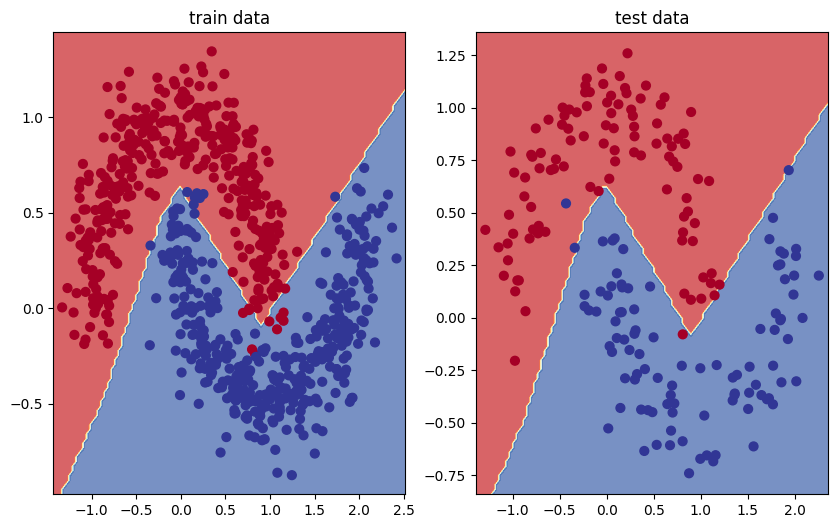

In [38]:
plt.figure
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model,X_train,y_train)

plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model,X_test,y_test)


## multi class spiral

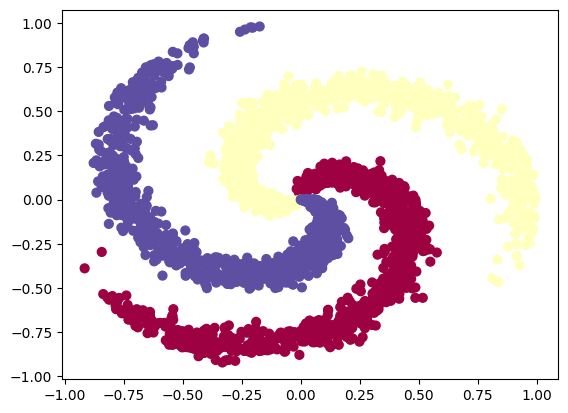

In [39]:
N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [40]:
# creating a model
# model2 = nn.Sequential(
#             nn.Linear(in_features=2,out_features=10),
#             nn.ReLU(),
#             nn.Linear(in_features=10, out_features=10),
#             nn.ReLU(),
#             nn.Linear(in_features=10,out_features=3)
# ).to(device)

model2 = nn.Sequential(
            nn.Linear(in_features=2,out_features=10),
            nn.Tanh(),
            nn.Linear(in_features=10, out_features=10),
            nn.Tanh(),
            nn.Linear(in_features=10,out_features=3)
).to(device)

model2

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Tanh()
  (4): Linear(in_features=10, out_features=3, bias=True)
)

In [41]:
X,y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.LongTensor)
X.dtype, y.dtype

(torch.float32, torch.int64)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train, X_test, y_train,y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(),lr=0.1)

In [44]:
# creating training and testing loop
torch.manual_seed(42)
epochs = 3000

for epoch in range(epochs):
  # training the model
  model2.train()

  # forward pass
  y_logits = model2(X_train)
  # y_pred = torch.round(torch.softmax(y_logits))
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  # loss and accuracy
  loss = loss_fn(y_logits,y_train)
  acc = acc_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # backward propogation
  loss.backward()

  # optimizer step
  optimizer.step()

  # testing model
  model2.eval()
  with torch.inference_mode():
    y_test_logits = model2(X_test)
    y_test_pred = torch.softmax(y_test_logits,dim=1).argmax(dim=1)


    test_loss = loss_fn(y_test_logits, y_test)
    test_acc = acc_fn(y_test_pred, y_test)

    if epoch%100 ==0 :
      print(f" train loss:{loss} train accuracy:{acc:.2f}% test loss:{test_loss} test accuracy:{test_acc:.2f}%")


 train loss:1.0953768491744995 train accuracy:33.29% test loss:1.0957614183425903 test accuracy:33.50%
 train loss:0.8425065875053406 train accuracy:54.71% test loss:0.8494763970375061 test accuracy:52.50%
 train loss:0.7443386316299438 train accuracy:54.58% test loss:0.7522287368774414 test accuracy:53.83%
 train loss:0.725732147693634 train accuracy:55.37% test loss:0.7332637310028076 test accuracy:53.83%
 train loss:0.7108089327812195 train accuracy:56.17% test loss:0.7183865308761597 test accuracy:54.50%
 train loss:0.692356288433075 train accuracy:57.50% test loss:0.699996829032898 test accuracy:56.00%
 train loss:0.6643255352973938 train accuracy:59.50% test loss:0.671951174736023 test accuracy:58.67%
 train loss:0.6203286647796631 train accuracy:63.58% test loss:0.627658486366272 test accuracy:63.17%
 train loss:0.562987744808197 train accuracy:70.17% test loss:0.5699236392974854 test accuracy:69.50%
 train loss:0.5019432306289673 train accuracy:76.38% test loss:0.50882416963577

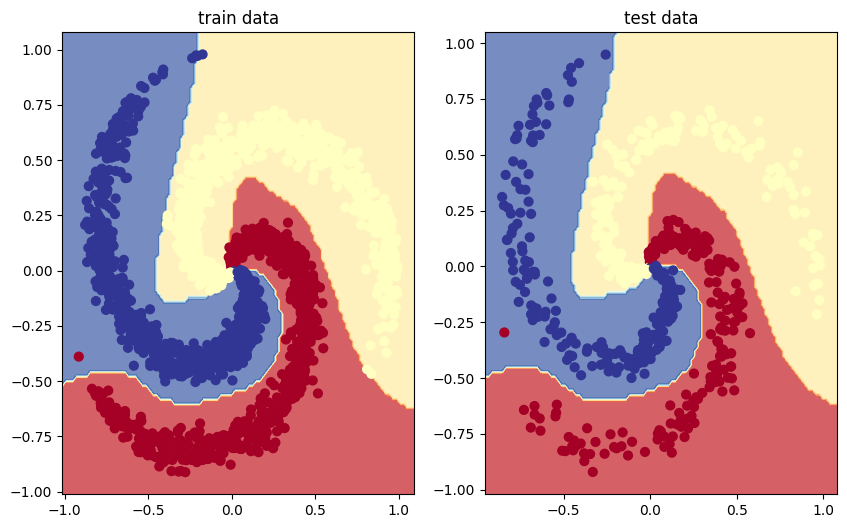

In [45]:
plt.figure
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model2,X_train,y_train)

plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model2,X_test,y_test)